<a href="https://colab.research.google.com/github/andrebezada/Cuadernos/blob/main/Clase_2_CEBI_Alumno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch

from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image 
import urllib.request as request
from matplotlib import pyplot as plt 

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import torch

## Tensores

In [7]:
def plot_cube(max_x,max_y,max_z, annot_x, annot_y, annot_z):
    # This import registers the 3D projection, but is otherwise unused.
    from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


    # prepare some coordinates
    x, y, z = np.indices((8, 8, 8))

    # draw cuboids in the top left and bottom right corners, and a link between them
    cube1 = (x < max_x) & (y < max_y) & (z < max_z)

    # combine the objects into a single boolean array
    voxels = cube1

    # set the colors of each object
    colors = np.empty(voxels.shape, dtype=object)
    colors[cube1] = 'white'


    # and plot everything
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax._axis3don = False
    ax.view_init(40, 220)
    ax.voxels(voxels, facecolors=colors, edgecolor='k')
    ax.text(3.5/3*max_x, 1.5/3*max_y, max_z, annot_y)
    ax.text(1.5/3*max_x, 4/3*max_x, max_z, annot_x)
    ax.text(0, 5/3*max_y, 3/8*max_z, annot_z)

    plt.show()

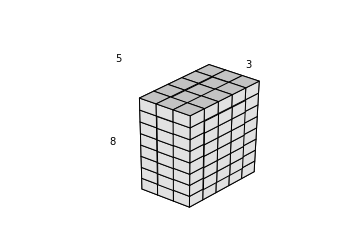

In [8]:
plot_cube(5,3,8,5,3,8)

In [14]:
A = torch.zeros((8,3,5))

In [ ]:
A

In [11]:
A.device

device(type='cpu')

In [13]:
A.size()

torch.Size([8, 3, 5])

## Redes neuronales

In [16]:
import torch
import torch.nn as nn

linear = nn.Linear(in_features=4096, out_features=10) # tensores de dim 1 input
conv = nn.Conv2d(in_channels=3, out_channels=9, kernel_size=3, stride=1, padding=1) #modificar los canales, no va a modificar
relu = nn.ReLU(False)

In [17]:
x = torch.randn(4096)
y = linear(x)
y.size()

torch.Size([10])

In [18]:
x = torch.randn(1,3,7,7)
y = conv(x)
z = relu(x)

In [19]:
y.size()

torch.Size([1, 9, 7, 7])

In [20]:
x

tensor([[[[-0.8175, -0.6787, -0.5744,  0.9983, -0.8535,  0.9616, -0.7701],
          [-0.1059, -0.6900, -0.3990,  0.0441,  0.7222,  0.9824, -0.4048],
          [ 1.2847, -0.9514,  1.0016, -2.9995,  1.5919,  1.0198, -0.9406],
          [-0.3783,  0.0239,  0.1168, -0.4379,  1.3458, -1.4897,  0.2311],
          [-0.9170, -1.1106,  0.6771,  2.1645, -1.1640,  0.0350,  0.2022],
          [-0.9129,  0.2396, -0.9034, -0.4660, -0.0455,  1.1932, -0.3181],
          [ 0.2726, -0.5245, -0.1655, -0.4500, -2.2215, -0.4708,  0.6242]],

         [[ 0.4428, -0.5968, -0.8017,  1.9328,  0.2532, -2.0927,  0.7391],
          [-1.5889, -0.7276, -0.6856, -1.0969,  0.7117,  1.4683, -0.7404],
          [ 1.3807,  1.4676,  1.9599, -0.1636, -0.9593, -0.1386, -1.7331],
          [ 0.8246,  1.2729,  0.3789, -1.0693,  0.5096, -1.3362, -1.3533],
          [-0.9751,  1.0296,  0.8615, -0.1650,  0.0195,  0.9187, -1.1503],
          [ 1.9259,  1.1611, -0.7714,  0.7654,  0.6580, -0.0263,  1.8926],
          [ 0.1580, -0.

In [21]:
z

tensor([[[[0.0000, 0.0000, 0.0000, 0.9983, 0.0000, 0.9616, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0441, 0.7222, 0.9824, 0.0000],
          [1.2847, 0.0000, 1.0016, 0.0000, 1.5919, 1.0198, 0.0000],
          [0.0000, 0.0239, 0.1168, 0.0000, 1.3458, 0.0000, 0.2311],
          [0.0000, 0.0000, 0.6771, 2.1645, 0.0000, 0.0350, 0.2022],
          [0.0000, 0.2396, 0.0000, 0.0000, 0.0000, 1.1932, 0.0000],
          [0.2726, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6242]],

         [[0.4428, 0.0000, 0.0000, 1.9328, 0.2532, 0.0000, 0.7391],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.7117, 1.4683, 0.0000],
          [1.3807, 1.4676, 1.9599, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.8246, 1.2729, 0.3789, 0.0000, 0.5096, 0.0000, 0.0000],
          [0.0000, 1.0296, 0.8615, 0.0000, 0.0195, 0.9187, 0.0000],
          [1.9259, 1.1611, 0.0000, 0.7654, 0.6580, 0.0000, 1.8926],
          [0.1580, 0.0000, 0.0000, 0.5099, 0.5444, 1.9680, 0.0000]],

         [[0.0000, 1.2013, 0.0000, 0.0000, 0

# Modelo pre-entrenado

---



<a align="center">
    <img src="https://miro.medium.com/max/2400/1*kvBklsrQ26qnP7vepy1DmQ.png" width="600">
</a>

In [26]:
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


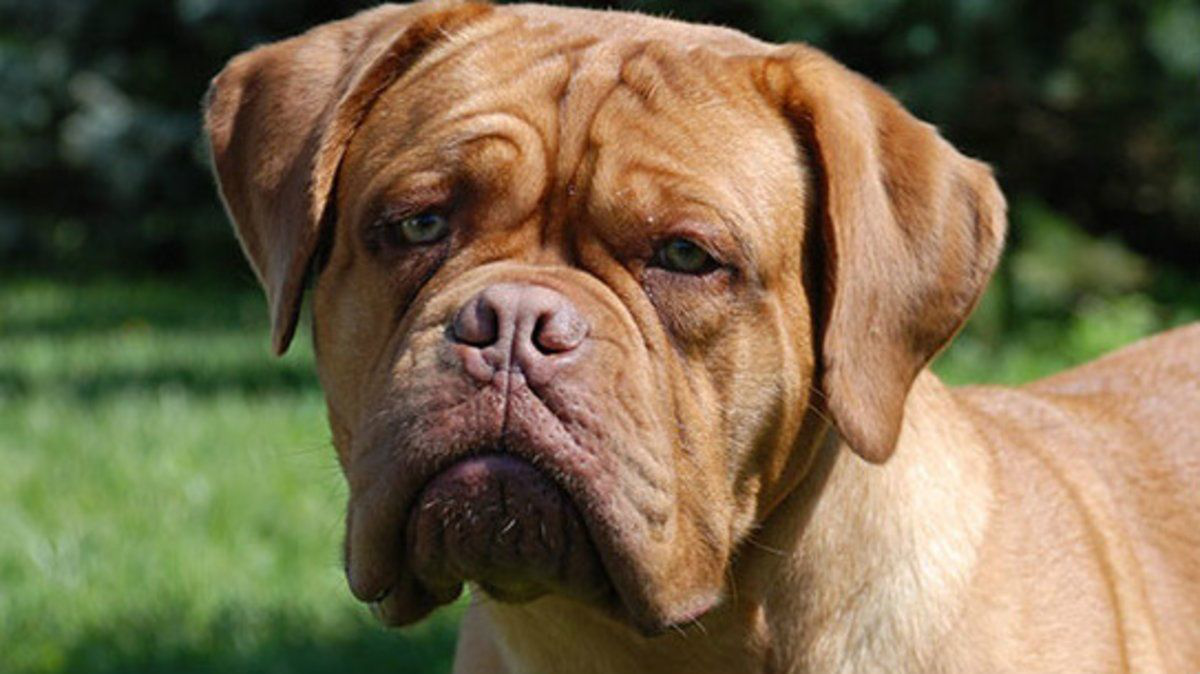

In [38]:
#inserta link de la imagen 
#data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYWFRgVFhYYGBUYGBgYGBgYGRIYFRgYGBgZGRgYGBgcIS4lHB4rHxgYJjgmKy8xNTU1GiQ7QDs0Py40NTEBDAwMEA8QHhISHjQhISE0NDQ0NDE0NDQ0NDE0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0ND80ND8xNDQ/Pz8/NP/AABEIAMIBAwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAADAAECBAUGBwj/xAA6EAACAQMCBAMGBQMDBAMAAAABAgADBBESIQUxQVEGInEHEzJhgZEUQqGxwXLR8CNSsiSi4fEVU5L/xAAZAQADAQEBAAAAAAAAAAAAAAABAgMABAX/xAAjEQADAQADAQEBAAEFAAAAAAAAAQIREiExA0FRYQQTIjJx/9oADAMBAAIRAxEAPwDyu2p4M0KjeX6Smiy0ygrIPtmkyaz5MhiWWSIU4/LBWAVJp2QA2lVUlq2G8WnoV6FuhtMurNe4XaZtRJpeBr0ewGfvNOvSyspWCTSuOQjfofwx7ihM5hvNi5G0y6o3jIBGnTLEAAknkACSfQCWK9hUT40dO2tWXn6idJ7OnK3DMqgtpCgnpk5OPtPT/Hloa3Cqn5mp6KgOMthWGr9Mwmxng+Y6mPiMTFATUwkBnEdnmwxJjBsY+uNMYnb0Hc6UVmbsoJP2Eg6EEgggjmCCCPUGemexa3PvritjyrTVM421MckfYfrMf2sUwt6GCgaqak4GMnJGfWMbHmnGoZYpmVkaFV4MMGd4J95NVzLNK2zEdYDTOWkecmDNd7YATMrpgzKuRtIh5BzmNFGGGEeKKMYaKPFMY0lpmOxIBlxE7wNwB0nHyekHTT6M9lMcLLQTaL3cdWZfXvGAVYdFIxHRN5cWmMRaoLv9RWqVMiU2EtvtK9desMvWNy5FizUYhLmpB2gj3UtPpV9Iq1nlW1s3qvpUep6KO7HoIY0yTgdeU6Ggnu1WmmNTYLEcyT3lEhUtNPwZw8UqynzFNWlnI8pcjkJ7JY01xjAKEYIPIg8xj0nIWXBmKUkXSFTD75xqI57czO1sKIVQCdR+w+0LQd/D5t8WcO/DXlaiBhVclf6G8y/vMfE+l+L+DLK4c1KtBWqNjLAuCcbDkflMa49lFg/we8T5K+R/3AzYLuHgBEgZ7hdexmgfguKi/JgjTPrexlfy3TZ+aD+DBht/p4+IQCem1fY5X/Jc02PZkdf1yZWX2X3VN1LBKiDdtBOcg7KQek2MzZ6B7O+CChYUwww7/wCo/fL8gfRcCcL7aaGKluwG2l1z9QQP3nrtshVFBXThQMdtuU8+9qluHsy/5qdRWHoTpP7zDrw8YUbR8yWmQYRRS1bOJpI/KYatiXKdxtEud7EaNSvW2mRWbJhHqmVmM0Tg0oaKKKVGFFFFMYUUbMUwNNt3gnM1qlhgfOUnszPPmkcidL0r0jLGjaUWBUzQt6gIjUv1DuVS0i1PG8E9aa62wYYgLnh+BEmv6TykZ1JdR+UvvZgqD1mQ1XS0v0L7UJV8l2h4dJk2p6ZTrHeW3qZhuCcLNzcJTBIBOWI6KOZ/iVitOjlvR0PgDwytQPc1h/pqCqA53bqw79pb4P4Qqi8apVK6FbKY5MOm3cdp3NJkpotNBhFGkDbpJI+o5nTKGbxYi9b01AAB/vNCmZn0FPX9pdRsCEQsaoVJXptmGQ4gYwcCAdTkw6tA1H3gNggkcrErRGY2ESs4r2i8NZ7OsqAk6Q4AG50HJH2E7UiCqrnnNhj5VQZkSk672hcCFrdtpXFKqNaDoCT51Hod/rOVzE8ZsAskSJiTMZpjEmg2jFpHMwESiiijDCjGPGmMNFHxFMY9EOCMwNSkCIJK+whPfbTyVpzGbfWgAziY6sV+k6G6fyznLkEGdHze9BTOj4ZWyBLl8uR6zn+GXGABOhqVfLvI0mrB6chf251HAhrO1IG8u3A88vWiDG4l/wDc6xjKlPpj3IIm/wCB+JLSd8jzsAA3YdZXvrfbYTPsgVY/MR/lS5Iyab09Kt74vqdvh5L6d5scLrBjjM4e34gdCgDYcz0m54W4gHcgkA/x6zuKI7mkep+gljBMo/iQOo/n1lujcjaLo2FlD9PrDK0y7q50sAOR/SWbZs7xdG4Muqd4Cs25hqQ3le4GDNoCVF+kNqlJDHSqScdJtDjLsg6xleT5wgOO8eeH/wAXbMige9Q66ZPcc1z0BG08BqoVYqwwykgg8wRsQZ9Q3DbkTwX2nWiUr5ihH+oiuyj8jnY59cZmaAvTlVOZJhAI0OWiBA1JFY9RoyxgE4oopgiiiimMNmKLEUxjrADj0kRXxKyXWRKtatOHgQzDoLdA8qcSsgMyXDK+w3lviDZEkqysFTMKxTcidBjKc5zD1dL5lv8A+S7S9S32h+P6X2p5bMNQqYkLGkX3l5+HbY6yLXfYjxvGULu52xKtCn1l2twwyK09IxKQv+SwKz8NJqoFFVAOW/THOWeD3Gh1AxjIGRz3lfhtL3jKm2AMfeEu6DUWO22rnzG289B+FJOi43w24bS1BizDcIxwrDsSNxOMvvGHE6DlGpLTKn4fdtj1Bzv9J6R4c4kKiAHGRtz3m1WxjBwc98GKdCenJeC/Eb3ianADo2lgNgOoO/ed9ZcvlMm2sEDF1UBmADHAGQDtym1SIAgUmqvwupiV7mlq5c5JXizDhMphcc4Gq4UFjsBufSaD08nMwfEFi1Wk9ENo1gqzb5wR0xBSK/PvoqWfiqg9U0kdTgfFrTGf9oBOZv07pc4z9J4/beyR9QLXKaQRnSjBsfIk7Gen8N4UlJFRASFGMsSzH1J3m88C5T7fRauXyxnzv46uveX1dhyDaf8A8ACfRNSng57z5o44dVxWPX3r/wDMxmzn/TNUwnvIwSRZYAjEyawcIkDCTiiihMKKKKYwooopjGtQpdoO5okSzZVBneXbwAicbp8iDKNhUIE0LqttzmZRfTkRV6sVxtaLSwDcJmBtk8wz3hfeZgCDnIl58wee1h2fDrpVUcpq0bpWnBUKj45y7ZcSKHBMhfyJX8v1HZXJUTIdlZsHYDJ+wmde8WyI1uxKAnmRz9Y/whqtf4b5y97Oh8OYLA9czoOLW+ukfL5l39fpOS8PVcVFGdp6TbJqBBGRjmP7Ts06UjhOCXbI+M6RO54dca1LnkM47H0nJXfDCtZsAAZ59vQTdS7VUCJ6fX5w8dCqw37a4zz/AM+UuC5IzvgDmTtMhLjSuAMsR9p554+8T1Ef8MgKnGpjnffkB8ucJv8AJ6TW8VWyNoeugb+ofvLK+IrYnaunprT+8+aHumzuTk7mGFZdtzv1HMQYFP8AwfU1vdBhkEEHljH6SVzT1DPWfOnAfFVe1YFKpdAfMjHbHyHT6T3Xw7xhbiklQHZxkdweo+8VoZdPUXFEmr5OOknWHURqFPrAlgarSNfpPmPiy/8AUVs//bU/5mfTl2eQnzT4iP8A1dxtj/Wf/kYX4SfpTCwFVYYPBVGiL0IEQiyIEmI5h4oopgiiiimMNFFFMY0w2If8T3kaiCVmWcaxnHLedhmcHlI6YNVkxGH3UNojou+JYRNoGsMcoFXeCJtUXsjGJnPSLP8AISHvm5S3w/mZRajpntgnoYE1bU+RfkMfaV75gFi4U+pD1wY8DNYzQtqxRww6T0Cz42FRTnJI+QP36zzlu8P70kAZ5cpRMx3b1i4d3wMA4wduXac/Z3TPUU52zAVuJt7oU87n4vTtCcMpZIJ7x0KztEt2D8yQcY9Md551424DWe7d28tBvMXxqCBEPQb9OU9RtnDIDn5j9hA3lurDTzzkdMbjkf8AOsRsrK3o+e6qsw1Z1AeXP7fpEB0z+XA585q8d4VUtqjoy4GDnTnSVZjp/wDUytQIAxuMfztGA0Tp0XTJZDt3HKe1eAqdWjTp0KigHRrXHTUc8/rPP/Dfh6veMGYEUwRqZs6Qo6D/AHGez2ygFRjCqoA+nLESmOpeaawbIhlXA+UDbDYyFW4AU5hJlS/r4IHXpPnPxA+q6rnvVf8A5Ge7X9yFV6jEAKrN6AAmfPjVNTsx5sxb7nP8wPwVjqkiySwsjWG0TexSrJCNHEoOh4oopgiiiimMKKPiKDTaXDWklOYtAhUAE52s8IOMJKkkFAiNTaV2qHMRJ6BLGGepgSoauTClMiQ0CUUoZzvZr2FopGTLy2wXOJjW94UGJdtLovntJ1NJmUVy0r8WHlOIHgmyk92x+ktcRXyyFguEH9Uv831hWi2w3iTJ5dNpJ/8ADCouBnqftKL0xCghzj/DOl4XahmUs2AOg5nYzNtaA5mX7cLnJYjbp1jabDs7SoqrpH5cA4yT2EOwBOO4yMd5iWF2pACg4yFyN+X+6Wb3iiW6aqrDSTsw+IH058orLxhl+O+CfiKJYOVNMFwOSEbZ1fTM8q8PcONe4p0ejMM8vhG5P2nonG/HlAJ5MuWGNPyOxDZ5TkfB99TW7982E+LSo2C6ttvpN+D0pdLD26igRAq9AABjngY5SaJnr/aVbG6DgFSG2G4Ow+vWWj8ufaIN9POi7Rfp1/WUeIvgEk8/8MsUqur5fpM3jC+ZNzvkY7mOjmaw5Tx3fmnZOR8T4Qd8MfMfltmeNJPWfajV02yIebv9BieTKIfwT+lpKm0hUeQWReLgMQhJCDBhFjBHiiimCKKKICKYlFJ6DFF0TkWmYRB4NTCpiTbwG4iQkGEMeUrVMxV2xOqDahiQJgdRhFMeVg8rCSpmanC0wp9ZXtUBE2LelhIWWn0zuKVPLiNwzdD/AFQXFzuIbhS4TPdj+kpAllyqsLTdQuCZCqJUuD5SB/hjs0/5Nu3qDTscwoXM4iz4o6NjJZeWP5BnR0eJgjYj5/L1iU8K8f4dHa3ehCNJK4/LnVnvOY8TcQ9+1PYroDAgjJ5+UnudoVLo51KxyAdgfKc9+8ElHJ1Egt15bmJyHUpFBrNAgdhufqT9JTq8LHxIdvtgzo/wyfEWwe2xkHpLvgE+g2+sPJhxM1PZ7eaAabE5LZG+NOw39J6YSSuUwTz57H69545YHRUViMZO/r2npXAeI5AB5A+mO2RF0p6sOhQtgauZG47RnpLnIGTyUnfGfiIgzXLNhdy2w/vDJT6A5xzPc9TKSc9rEeRe1e7JrrRx5VQNnvmcDonde0dGe+bK4AVQp7jExKdgMQVePDn5GGlMwn4Qma/4QCWqVuJKvpgW8OYe1YdJAKZ1j2gxMy6tQN48/TQzWmTiNDukCZRDDR0MaOqTMDD+8EUb3cUniFws6YJ3I5SRqRZEmuvRP/QQqmGp7xwBJU1jb/BkENMYkESFqnaVEqbxEmzJM2LClkTeejpSYXDX8wE6lUysNVxKJ8WcTxQEuAJoUqehUXsJburAa9XaCfmfkJf5PktJ1XJj1DKzGGdsyu4hodFJ7Ab469//ABCC2UDnnPMwoMRiMsrfhBXZPhO3bpDrdnqg/WCEYtAHSdW8foAvpHt7t+QcwSsOvKHokMcDeYBfo0jXwm4Y7Bl798S0l3XtnKOpLp5WH+7HWdr4T4AEC1XHmIyoxy7EzrxTX4mCnHLIUxuOhX0cnLeG61WrodkdPNhdYIyuOYnUOukcvWWLdCcu3byjsIK5bCnv/m0aVhO75PzDy/2kWmKqV1U4dQrHfGRyyOhxOW/FYE9Q8Z2ge25dR6ZPeeV3Ni3KT+krlpNfNvsE90CZMXGBM57NwcwgUxalFOPXZZa/7yjcXeY9WjtKFRIZlIHHCTvmBMeNKAFCI0HHUQsDLOsRQemKTFJsIyoYQ0GHOEojeCmjNpgvdmGpZhnG0Pa0siTVC8sKT/OVeu00by2PSUDSIO8rLRRWmaHDKvnAM6yhdADecTbN5hNkVCRBST6KdYal1chuXKUVbYxEYXT+sZMcpeZ4ykjmxLwgo23g3XaWQkHVE2DplJ1kckfaFcwLGLQ6EMyLGF19Iz4zvEH0rEGbHAKOuqigElnUY9TKKJk8p6J7O+EDX70jZeWe/SY2nolva6FC9gBHqU8kDvz9IYv2haVPA35mMIV7hsaV65/QSrdnURj8pGfSaNSnkym1LQT894wDN8QUx+HcdAufsRPOa4UzufGVcpaVn7KB6AkZM8jpcZ1bSf0T6ZX5UknpqPbgyo9qvaFp368onqCQdDVcsoXFrMm7o4m9XcTGv2B5R4pkORlMJCEcyAlghETMl7uKgYdjBTNTSQPRFCRSekeaNytbDEzqtLHKbJYYlSqmZCWQiqRnEnE0bIgCCWmMRLHY9V0WsBjA3dsMH0kaB80v111LEfRBW/UYtjQyfQzTSgQc9o3D0wT6y3WfMv8AFcq3+HZNbCKock8o6mEYQOZ1tCoNr2zAMQfWSXdSIyp2k2VQIqP8/eDYCHI3/SRZBjMVjoBp6xKmT85MpLFtbFiNoA6aHBOHa3Ax1nrnCrMUkVFG/X1nN+CuGYOsjkNvWdwBjpCkZjIDt8/lLaLA0mPL7mGzGFE5lO4JlhhmQIgwxm3NstRGpuMo6lT2IOxnz7xPhDUKr0zkaGIGcjIB2P2n0gyde05jx54fWvQNRFHvUGQerKOa/Oa5bXRH6bjaPFUyIcVTCtREfQMTkbIzbwpVro8pQrOZfukEoVFlIaGm9ZWjQoSL3ctp0J9DIZYRMwdNJqWNMdZKqJXfWFb3Ldo02tCxSXIhgmghFFEAvAbRxFFHZvwInOXE5RRRa8JfoS36wT/zGinT/pPGdk/9UDq/2/eDf+RFFOqgoen/AHhGiik2VRAxq3wn0jRRWORt+k2+GDcesaKKFHqPAtkGNtptGKKMgMMkRiihQBu8hT5mNFCBifkZG4+Bv6W/aKKMJXjPA7j429TAmKKcFenH+Gfc85SqRRRp9NBCnzhhHilGda8EstUIoolHO/SzFFFJmP/Z
#https://estaticos-cdn.elperiodico.com/clip/54639c02-8fda-41dd-bc03-1e7c81a3e2fb_alta-libre-aspect-ratio_default_0.jpg
url= 'https://estaticos-cdn.elperiodico.com/clip/54639c02-8fda-41dd-bc03-1e7c81a3e2fb_alta-libre-aspect-ratio_default_0.jpg'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img


In [39]:
preprocess = transforms.Compose([
      transforms.Resize(128),
      transforms.CenterCrop(96),
      transforms.ToTensor(),
      transforms.Normalize(
          mean= [0.485, 0.456, 0.406],
          std=[0.229, 0.224, 0.225]
      )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


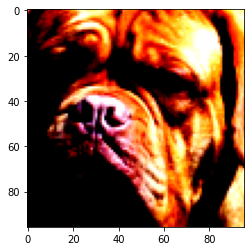

In [40]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1,2, 0))

In [ ]:
inception.eval()

In [ ]:
out = inception(batch)
out 

In [43]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [ ]:
out

In [45]:
_, index = torch.max(out, 1)

In [47]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('bull mastiff', 88.38330841064453)

In [48]:
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

bull mastiff 88.38330841064453
custard apple 5.492753028869629
bloodhound, sleuthhound 4.274440765380859
Sussex spaniel 0.350675106048584
basenji 0.2671895921230316
